In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True,
)

2025-11-12 08:26:39.131257: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 3488249856 exceeds 10% of free system memory.


In [ ]:
train_ds[0].shape

In [5]:
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

2025-10-17 13:50:29.393477: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 693630000 exceeds 10% of free system memory.


In [6]:
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [7]:
train_labels[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [9]:
train_ds[0].shape

TensorShape([150, 150, 3])

In [10]:
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

In [14]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 31s 1us/step


In [15]:
base_model.trainable = False

In [16]:
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

2025-10-17 13:52:28.968475: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 693630000 exceeds 10% of free system memory.
2025-10-17 13:52:29.835164: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 693630000 exceeds 10% of free system memory.


In [17]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [20]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [21]:
history=model.fit(train_ds, train_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 300s 5s/step - accuracy: 0.5212 - loss: 1.8522 - val_accuracy: 0.5875 - val_loss: 1.4591
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.7328 - loss: 0.7968 - val_accuracy: 0.6304 - val_loss: 1.2528
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 405s 6s/step - accuracy: 0.7922 - loss: 0.5692 - val_accuracy: 0.6304 - val_loss: 1.2601
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 378s 6s/step - accuracy: 0.8506 - loss: 0.3928 - val_accuracy: 0.6887 - val_loss: 1.2014
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 344s 5s/step - accuracy: 0.8774 - loss: 0.3302 - val_accuracy: 0.6693 - val_loss: 1.2560


In [22]:
los,accurac=model.evaluate(test_ds,test_labels)
print("Loss: ",los,"Accuracy: ", accurac)

35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8910 - loss: 0.2903
Loss:  0.2902832329273224 Accuracy:  0.891008198261261


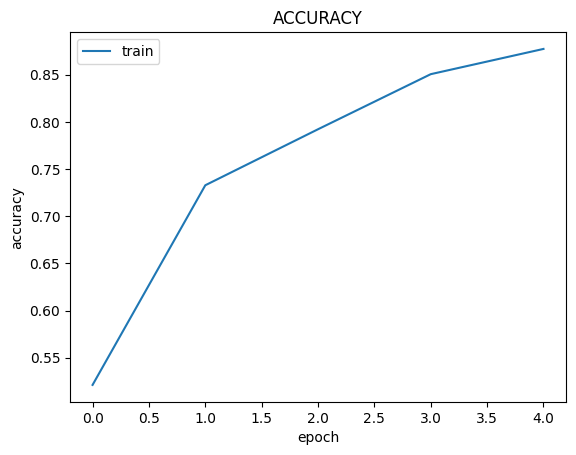

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [25]:
import numpy as np
import pandas as pd
y_pred = model.predict(test_ds)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:10])
print("\nTest")
print(test_labels[:10])

35/35 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step
[np.int64(2), np.int64(3), np.int64(3), np.int64(2), np.int64(3), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(4)]

Test
tf.Tensor(
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]], shape=(10, 5), dtype=float32)


In [26]:
info = tfds.builder("tf_flowers").info
class_names = info.features["label"].names

In [28]:
import random
idx = random.randint(0, len(test_ds) - 1)
img = test_ds[idx]
true_label = test_labels[idx]
img_batch = np.expand_dims(img, axis=0)
pred = model.predict(img_batch)
pred_class = np.argmax(pred, axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [33]:
pred_class
pred

array([[9.9999774e-01, 6.9658051e-07, 1.5100794e-06, 1.9636818e-08,
        1.7093579e-10]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


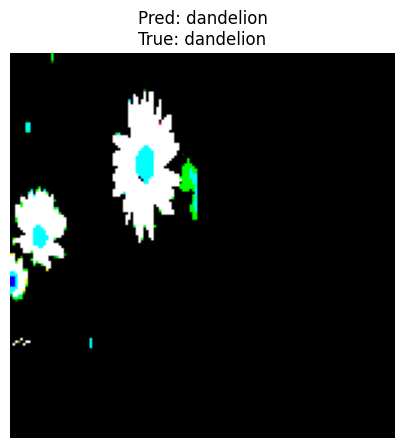

In [41]:
import random

class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Convert tensors to NumPy arrays if needed
test_images_np = test_ds.numpy()
test_labels_np = test_labels.numpy()

# Pick one random index
idx = random.randint(0, test_images_np.shape[0] - 1)
sample_image = test_images_np[idx]
sample_label = test_labels_np[idx]

# Predict
prediction = model.predict(np.expand_dims(sample_image, axis=0))

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow((sample_image + 1) / 2)  # scale to 0-1 for display

pred_label = class_names[np.argmax(prediction[0])]
true_label = class_names[np.argmax(sample_label)]

plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
plt.axis("off")
plt.show()